# Lab 004 - and the subgradient method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple


In [2]:
def stepFunC(k,val,g,data=None):
    return data

def stepFunH(k,val,g,data=1.0):
    step = data/k 
    return step
    
    
def stepFunG(k,val,g,data=1.0):
    step = data/ np.sqrt(k) 
    return step


def subgradient_descent(f, x0, max_iter=100, eps=1e-6, data=None, stepFun=None):
    """
    f          : callable returning (value, asubgradient)
    x0         : starting point
    max_iter   : iteration budget
    eps        : stop if |g| ≤ eps
    c          : stepsize constant, α_k = c / √k
    """
    x = x0
    best_x=np.array(x)
    best_val=None
    history = []                         
    for k in range(1, max_iter + 1):
        val, g = f(x)
        if best_val is None: best_val=val
        else: 
            if val<best_val:
                best_val = val 
                best_x = np.array(x)
            
        history.append((k, x, val, g))
        if np.abs(g).max() <= eps:                
            break
        alpha = stepFun(k,val,g,data=data)         
        x = x-alpha * g
    history = pd.DataFrame(history,columns=['iter', 'x', 'fVal', 'subg'])
    return best_x,best_val, history



Q1.
 
$
f_1(x) = |x|
$



In [3]:
def abs_value(xx: np.ndarray) -> tuple[float,np.ndarray]:
    """
    f(x) = |x|
    returns (function value, one valid subgradient g ∈ ∂f(x))
    """
    x=xx[0]
    if   x > 0:  g =  1.0
    elif x < 0:  g = -1.0
    else:        g =  0.8         # any g∈[‑1,1] is valid; choose 0
    return abs(x), np.array([g])


In [4]:
x_star, val, trace = subgradient_descent(abs_value, x0=np.array([5.0]), max_iter=100, data=5, stepFun=stepFunH)
print(f"approx minimizer  x* = {x_star}")
print(f"value            f(x*) = {val:.6f}")

approx minimizer  x* = [0.]
value            f(x*) = 0.000000


    iter                         x      fVal    subg
0      1                     [5.0]  5.000000   [1.0]
1      2                     [0.0]  0.000000   [0.8]
2      3                    [-2.0]  2.000000  [-1.0]
3      4    [-0.33333333333333326]  0.333333  [-1.0]
4      5      [0.9166666666666667]  0.916667   [1.0]
..   ...                       ...       ...     ...
95    96  [-2.000409639789369e-06]  0.000002  [-1.0]
96    97    [0.052081332923693546]  0.052081   [1.0]
97    98   [0.0005349411711162294]  0.000535   [1.0]
98    99    [-0.05048546699214908]  0.050485  [-1.0]
99   100  [1.9583512901426292e-05]  0.000020   [1.0]

[100 rows x 4 columns]


<Axes: >

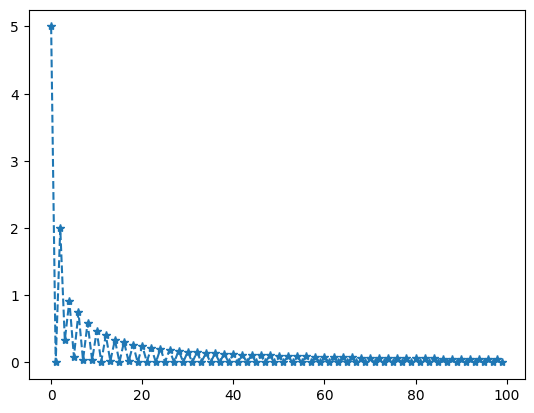

In [5]:
print(trace)
trace['fVal'].plot(style='*--')

Q2.
 
$
f_2(x) = max\{-2x, x+3, |x-1|\}
$



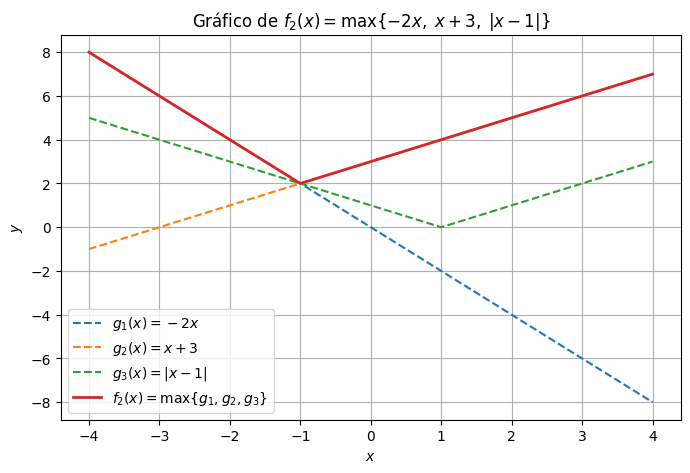

In [6]:
def g1(x):  # -2x
    return -2 * x

def g2(x):  # x + 3
    return x + 3

def g3(x):  # |x - 1|
    return np.abs(x - 1)

def f2(x):
    return np.maximum.reduce([g1(x), g2(x), g3(x)])

# Make a grid of x values
x = np.linspace(-4, 4, 1000)
y_f2 = f2(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, g1(x), label=r"$g_1(x)=-2x$", linestyle="--")
plt.plot(x, g2(x), label=r"$g_2(x)=x+3$", linestyle="--")
plt.plot(x, g3(x), label=r"$g_3(x)=|x-1|$", linestyle="--")
plt.plot(x, y_f2, label=r"$f_2(x)=\max\{g_1,g_2,g_3\}$", linewidth=2)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Gráfico de $f_2(x)=\max\{-2x,\;x+3,\;|x-1|\}$")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
def f2(xx: float) -> Tuple[float, float]:
    """
    f2(x) = max{-2x, x+3, |x-1|}
    Returns (value, one valid subgradient)
    """
    # values of each branchx
    x = xx[0]
    v1 = -2 * x
    v2 = x + 3
    v3 = abs(x - 1)

    max_val = max(v1, v2, v3)

    # identify active branches
    active = []
    if v1 == max_val:
        active.append(-2)              # subgradient of -2x
    if v2 == max_val:
        active.append(1)               # subgradient of  x+3
    if v3 == max_val:
        # subgradient of |x-1|
        if x < 1:
            active.append(-1)
        elif x > 1:
            active.append(1)
        else:                          # x == 1
            active.append(0)

    # choose a subgradient:
    # if 0 lies in the convex hull of active gradients, pick 0
    g_min, g_max = min(active), max(active)
    if g_min <= 0 <= g_max:
        g = 0.0
    else:
        # simple average (still inside the convex hull)
        g = sum(active) / len(active)

    return max_val, np.array([g])

In [8]:
x_star, val, trace = subgradient_descent(f2, x0=np.array([4.0]), max_iter=1000, data=1, stepFun=stepFunH)
print(f"approx minimizer  x* = {x_star}")

print(f"value            f(x*) = {val:.6f}")

approx minimizer  x* = [-0.99996905]
value            f(x*) = 2.000031


     iter                      x      fVal    subg
0       1                  [4.0]  7.000000   [1.0]
1       2                  [3.0]  6.000000   [1.0]
2       3                  [2.5]  5.500000   [1.0]
3       4   [2.1666666666666665]  5.166667   [1.0]
4       5   [1.9166666666666665]  4.916667   [1.0]
..    ...                    ...       ...     ...
995   996  [-0.9999690487961558]  2.000031   [1.0]
996   997  [-1.0009730648604127]  2.001946  [-2.0]
997   998  [-0.9989670468062503]  2.001033   [1.0]
998   999  [-0.9999690508142662]  2.000031   [1.0]
999  1000  [-1.0009700518152673]  2.001940  [-2.0]

[1000 rows x 4 columns]


<Axes: >

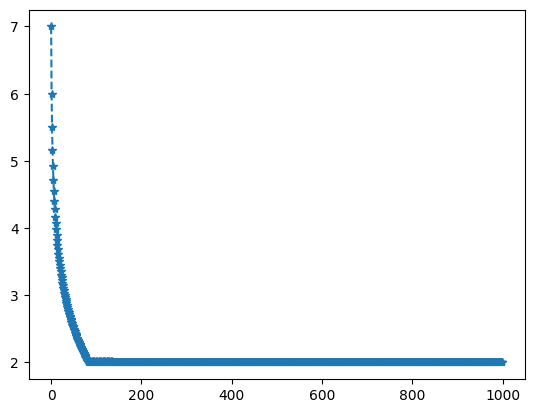

In [9]:
print(trace)
trace['fVal'].plot(style='*--')

Q3.
 
$
f_3(x) = max\{x^2, x+1, -2x\}
$



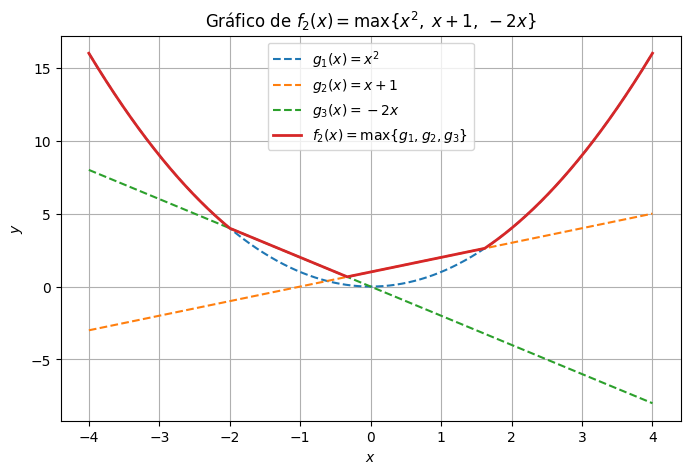

In [10]:
def g1(x): 
    return x ** 2

def g2(x): 
    return x + 1

def g3(x):  
    return -2 * x

def f3(x):
    return np.maximum.reduce([g1(x), g2(x), g3(x)])

# Make a grid of x values
x = np.linspace(-4, 4, 1000)
y_f3 = f3(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, g1(x), label=r"$g_1(x)=x^2$", linestyle="--")
plt.plot(x, g2(x), label=r"$g_2(x)=x+1$", linestyle="--")
plt.plot(x, g3(x), label=r"$g_3(x)=-2x$", linestyle="--")
plt.plot(x, y_f3, label=r"$f_2(x)=\max\{g_1,g_2,g_3\}$", linewidth=2)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Gráfico de $f_2(x)=\max\{x^2,\;x+1,\;-2x\}$")
plt.legend()
plt.grid(True)
plt.show()


Implementar o subgradiente

Q4. L1 Norm
 
$
f_4(x) = ||x - (1,2)||_1 = |x_1 - 1| + |x_2 - 2|
$



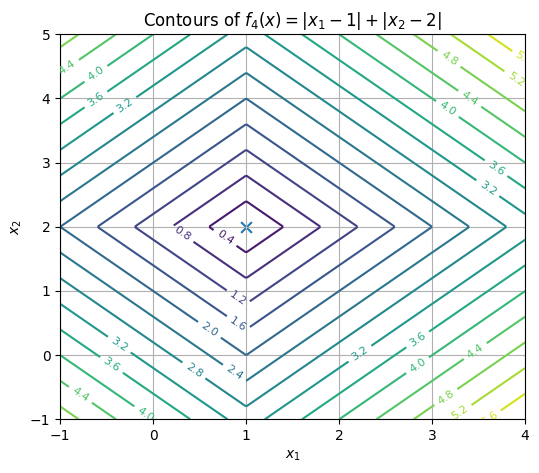

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Build a grid in R²
x1 = np.linspace(-1, 4, 300)
x2 = np.linspace(-1, 5, 300)
X1, X2 = np.meshgrid(x1, x2)

# f4(x1,x2) = |x1-1| + |x2-2|
Z = np.abs(X1 - 1) + np.abs(X2 - 2)

# Plot a contour map
plt.figure(figsize=(6, 5))
cp = plt.contour(X1, X2, Z, levels=15)
plt.clabel(cp, inline=True, fontsize=8)
plt.scatter([1], [2], marker='x', s=60)  # the minimum point
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contours of $f_4(x)=|x_1-1| + |x_2-2|$")
plt.grid(True)
plt.show()


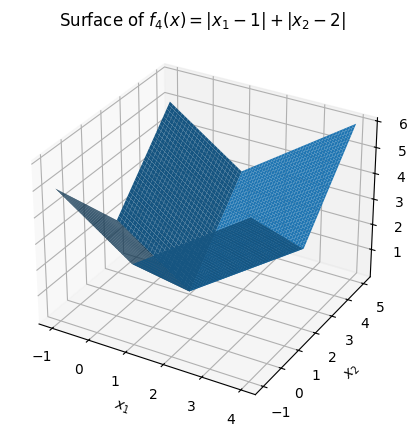

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, rstride=5, cstride=5, linewidth=0.3)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f_4(x)$')
plt.title(r'Surface of $f_4(x)=|x_1-1|+|x_2-2|$')
plt.show()


In [11]:
import functions_lista1

In [17]:
functions_lista1.f4(np.array([1.0, 2.0]))

(0.0, array([-1, -1]))

approx minimizer  x* = [1. 2.]
value            f(x*) = 0.000000
    iter                                         x      fVal      subg
0      1                                [1.0, 2.0]  0.000000  [-1, -1]
1      2                                [2.0, 3.0]  2.000000    [1, 1]
2      3                                [1.5, 2.5]  1.000000    [1, 1]
3      4  [1.1666666666666667, 2.1666666666666665]  0.333333    [1, 1]
4      5  [0.9166666666666667, 1.9166666666666665]  0.166667  [-1, -1]
..   ...                                       ...       ...       ...
95    96   [1.0105260086838797, 2.010526008683879]  0.021052    [1, 1]
96    97   [1.000109342017213, 2.0001093420172125]  0.000219    [1, 1]
97    98   [0.9898000636666975, 1.989800063666697]  0.020400  [-1, -1]
98    99    [1.0000041452993504, 2.00000414529935]  0.000008    [1, 1]
99   100  [0.9899031351983404, 1.9899031351983398]  0.020194  [-1, -1]

[100 rows x 4 columns]


<Axes: >

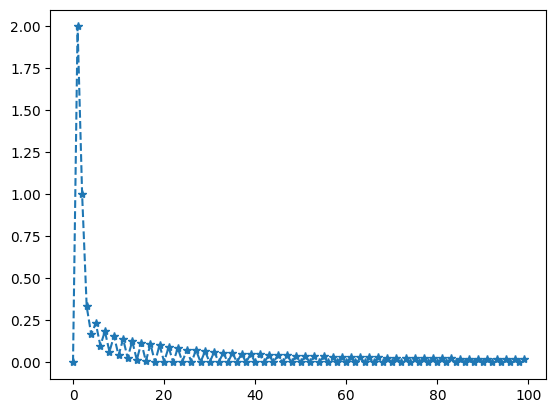

In [14]:
x_star, val, trace = subgradient_descent(functions_lista1.f4, x0=np.array([1.0,2]), max_iter=100, data=1, stepFun=stepFunH)
print(f"approx minimizer  x* = {x_star}")

print(f"value            f(x*) = {val:.6f}")
print(trace)
trace['fVal'].plot(style='*--')

#### solving 8


In [13]:
import lab4_BrunoSchelk

ModuleNotFoundError: No module named 'lab4_BrunoSchelk'

approx minimizer  x* = [ 0.00964797 -0.0203907   0.01696     0.00669436]
value            f(x*) = 0.053693
     iter                                                  x          fVal  \
0       1                       [-1000.0, 20.0, -3.0, 300.0]  1.090409e+06   
1       2                        [-800.0, 16.0, -2.4, 240.0]  6.978618e+05   
2       3                       [-640.0, 12.8, -1.92, 192.0]  4.466315e+05   
3       4                     [-512.0, 10.24, -1.536, 153.6]  2.858442e+05   
4       5       [-409.6, 8.192, -1.2288000000000001, 122.88]  1.829403e+05   
..    ...                                                ...           ...   
995   996  [0.009647968571695448, -0.020390697779199746, ...  5.369303e-02   
996   997  [-0.09035203142830456, 0.07960930222080026, -0...  3.463070e-01   
997   998  [0.009647968571695448, -0.020390697779199746, ...  5.369303e-02   
998   999  [-0.09035203142830456, 0.07960930222080026, -0...  3.463070e-01   
999  1000  [0.009647968571695448, -

<Axes: >

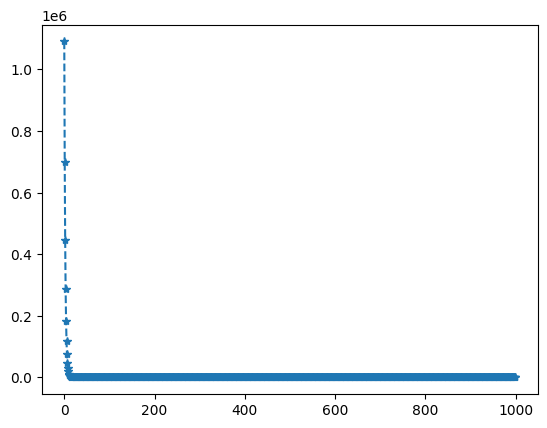

In [ ]:
x_star, val, trace = subgradient_descent(lab4_BrunoSchelk.f8, x0=np.array([-1000.0,20,-3.0,300.0]), max_iter=1000, data=0.1, stepFun=stepFunC)
print(f"approx minimizer  x* = {x_star}")

print(f"value            f(x*) = {val:.6f}")
print(trace)
trace['fVal'].plot(style='*--')

In [ ]:
# f(x) = ||Ax-b||_2 + \lambda||x||_1
# not sure
def f10(x, A, b, lamb):
    aux = A.dot(x)-b
    Naux=np.linalg.norm(aux)
    fval =  Naux+ lamb*np.abs(x).sum()
    if np.abs(aux).max()>0:
        grad1 = A.T.dot(aux)/Naux
    else: grad1 = np.zeros_like(x)
        
    grad2 = lamb*np.sign(x)
    return fval, grad1+grad2
    

In [ ]:
A = 10*np.random.randn(50*100).reshape(50,-1)
xSol = np.random.randn(100)
b = A.dot(xSol)
lamb = 0.001
F10 = lambda x:f10(x,A,b,lamb)

In [ ]:
x0 = np.zeros_like(xSol)

value            f(x*) = 0.048191


<Axes: >

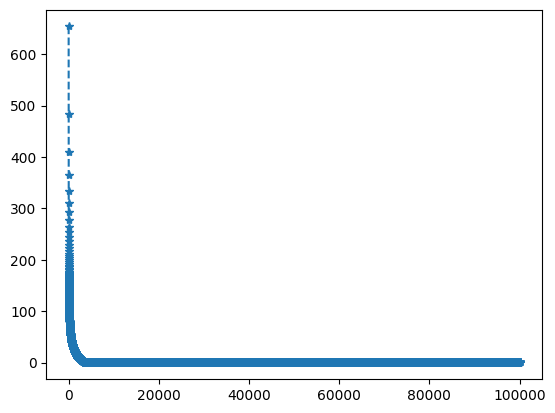

In [ ]:
x_star, val, trace = subgradient_descent(F10, x0=x0, max_iter=100000, data=0.01, stepFun=stepFunH)
#print(f"approx minimizer  x* = {x_star}")

print(f"value            f(x*) = {val:.6f}")
#print(trace)
trace['fVal'].plot(style='*--')

In [ ]:
F10(xSol)

(0.0707644405319805,
 array([ 0.001, -0.001, -0.001, -0.001,  0.001,  0.001, -0.001,  0.001,
         0.001,  0.001, -0.001, -0.001,  0.001,  0.001, -0.001,  0.001,
        -0.001, -0.001,  0.001, -0.001,  0.001,  0.001, -0.001, -0.001,
        -0.001,  0.001, -0.001,  0.001,  0.001,  0.001, -0.001,  0.001,
        -0.001,  0.001,  0.001, -0.001, -0.001, -0.001,  0.001,  0.001,
         0.001,  0.001,  0.001,  0.001,  0.001, -0.001,  0.001, -0.001,
        -0.001,  0.001,  0.001, -0.001, -0.001, -0.001, -0.001,  0.001,
        -0.001,  0.001, -0.001,  0.001,  0.001, -0.001, -0.001,  0.001,
        -0.001,  0.001,  0.001, -0.001, -0.001, -0.001, -0.001,  0.001,
         0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001,
        -0.001, -0.001,  0.001,  0.001,  0.001,  0.001, -0.001,  0.001,
         0.001,  0.001,  0.001,  0.001, -0.001, -0.001, -0.001, -0.001,
        -0.001, -0.001, -0.001,  0.001]))